In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.0.1+cpu


### Introduction To Tensors

#### Creating tensors

In [12]:
scalar = torch.tensor(7)
scalar

tensor(7)

In [14]:
scalar.ndim # ndim - number of dimensions

0

In [15]:
# Get tensor back as python int using .item()
scalar.item()

7

In [19]:
# Vector
vector = torch.tensor([7, 7, 7])
vector

tensor([7, 7, 7])

In [20]:
vector.ndim

1

In [21]:
vector.shape

torch.Size([3])

```.ndim``` vs ```.shape```
<br>
```.ndim``` - number of dimensions
<br>
```.shape``` - size of each dimension

In [47]:
# Matrix
MATRIX = torch.tensor(
    [[1 , 2 , 3] , [4 , 5 , 6] , [7 , 8 , 9]]
)
MATRIX

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [26]:
MATRIX.ndim

2

In [29]:
MATRIX.shape

torch.Size([2, 3])

In [34]:
MATRIX[0]

tensor([1, 2, 3])

In [38]:
# Tensor
TENSOR = torch.tensor(
    [
        [
            [1 , 2 , 3],
            [4 , 5 , 6],
            [7 , 8 , 9]
        ],
        [
            [10 , 11 , 12],
            [13 , 14 , 15],
            [16 , 17 , 18]
        ]
    ]
)

TENSOR

tensor([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],

        [[10, 11, 12],
         [13, 14, 15],
         [16, 17, 18]]])

In [39]:
TENSOR.ndim

3

In [40]:
TENSOR.shape

torch.Size([2, 3, 3])

In [46]:
TENSOR[1][2][2].item()

18

#### Random Tensors

Q - Why random tensors?
<br>
A - Random tensors are useful for initializing weights during model design

```
1 - Start with random numbers.
2 - Look at data.
3 - Update random numbers.
4 - Repeat until random numbers are good.
```

In [50]:
# Create a random tensor of size (3 , 4)
random_tensor = torch.rand(3 , 4)
random_tensor

tensor([[0.8639, 0.3776, 0.1552, 0.2061],
        [0.6755, 0.3890, 0.0383, 0.9757],
        [0.7893, 0.7204, 0.7083, 0.2356]])

In [52]:
random_tensor.ndim # you can read the number if brackets

2

In [3]:
# Create a random tensor with similar shape to an image tensor
random_image_tensor = torch.rand(size=(224 , 224 , 3)) # height , width , color channels (rgb)
random_image_tensor.shape , random_image_tensor.ndim

(torch.Size([224, 224, 3]), 3)

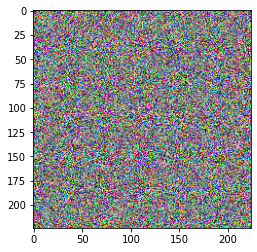

In [4]:
plt.imshow(random_image_tensor)

#### Zeros and Ones

In [60]:
# Create a tensor of all zeros
zeros = torch.zeros(3 , 4)
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [61]:
zeros * random_tensor

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [62]:
# Create a tensor of all ones
ones = torch.ones(3 , 4)
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [63]:
# get the data type from a tensor
ones.dtype

torch.float32

#### Create a range of tens and tensors-like

In [68]:
# User torch.arrange()
one_to_ten_tensor = torch.arange(start = 1 , end = 11)
one_to_ten_tensor

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [71]:
# Creating tenor like
ten_zeros = torch.zeros_like(input = one_to_ten_tensor)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### Tensor Data Types

**Note**: Tensor datatype is one of the three big errors you'll run into with PyTorch & Deep Learning:
1. Tensor not right datatype
2. Tensor not right shape
3. Tensor not on right device (CPU or GPU)

In [89]:
float_32_tensor = torch.tensor([3 , 6 , 9] ,
                             dtype = torch.float32 , # What datatype of the tensor. Examples: torch.float32 , torch.float16
                             device = None , # What device your tensor on. Examples: "cpu" , "cuda"
                             requires_grad=False # Does this tensor require gradients. Example: True , False
                             )

In [90]:
float_32_tensor.dtype

torch.float32

In [91]:
# Convert datatype of a tensor
float_16_tensor_01 = float_32_tensor.type(dtype = torch.float16)
float_16_tensor_02 = float_32_tensor.to(dtype = torch.float16)

float_16_tensor_01.dtype , float_16_tensor_02.dtype

(torch.float16, torch.float16)

#### Getting information from tensors

**Note**: To solve the three big errors you'll run into with PyTorch & Deep Learning you need to know how to get information from tensors:
1. Tensor not right datatype -> ```.dtype``` to get the datatype of a tensor
2. Tensor not right shape -> ```.shape``` to get the shape of a tensor
3. Tensor not on right device (CPU or GPU) -> ```.device``` to get the device of a tensor

In [97]:
some_tensor = torch.tensor([1 , 2 , 3])

print(f'The Tensor: {some_tensor}')
print(f'Tensor Datatype: {some_tensor.dtype}')
print(f'Tensor Shape: {some_tensor.shape}')
print(f'Tensor Device: {some_tensor.device}')


The Tensor: tensor([1, 2, 3])
Tensor Datatype: torch.int64
Tensor Shape: torch.Size([3])
Tensor Device: cpu


#### Manipulating Tensors (Tensor Operations)

Tensors Operations Include:
- Addition
- Subtraction
- Multiplication
- Division
- Matrix Multiplication

In [112]:
# Create a tensor
tensor = torch.tensor([1 , 2 , 3])

In [113]:
# Add 10 to each element in this tensor
tensor += 10

tensor

tensor([11, 12, 13])

In [114]:
# Subtract 10 from each element in this tensor
tensor -= 10

tensor

tensor([1, 2, 3])

In [115]:
# Multiply each element by 10
tensor *= 10

tensor

tensor([10, 20, 30])

##### Matrix Multiplication

Two main ways of preforming multiplication in neural networks and deep learning:
- Element-wise multiplication
- Matrix multiplication (dot product)

**Note:** There are two rules that preforming matrix multiplication must follow:
1. The **inner dimensions** must match
    * (3x5) x (5x3) -> ✅
    * (3x5) x (3x5) -> ❌
2. The resulting matrix has the shape of the **outer dimensions**
    * (3x5) x (5x3) -> (3x3)

More resources:
- [Visual example of matrix multiplication](http://matrixmultiplication.xyz/)


In [128]:
# Element wise multiplication
tensor = torch.tensor([1 , 2 , 3])

print(f'{tensor} * {tensor} = {torch.matmul(tensor , tensor)}')
print(f'{tensor} * {tensor} = {tensor*tensor}')
print(f'{tensor} * {tensor} = {torch.mul(tensor , tensor)}')

tensor([1, 2, 3]) * tensor([1, 2, 3]) = 14
tensor([1, 2, 3]) * tensor([1, 2, 3]) = tensor([1, 4, 9])
tensor([1, 2, 3]) * tensor([1, 2, 3]) = tensor([1, 4, 9])


In [127]:
# Matrix multiplication
first_tensor = torch.tensor([1 , 2 , 3])
second_tensor = torch.tensor([1 , 2 , 3])

print(f'{first_tensor} * {second_tensor} = {torch.matmul(first_tensor , second_tensor)}')
print(f'{first_tensor} * {second_tensor} = {first_tensor @ second_tensor}')
print(f'{first_tensor} * {second_tensor} = {torch.mul(first_tensor , second_tensor)}')

tensor([1, 2, 3]) * tensor([1, 2, 3]) = 14
tensor([1, 2, 3]) * tensor([1, 2, 3]) = 14
tensor([1, 2, 3]) * tensor([1, 2, 3]) = tensor([1, 4, 9])


In [130]:
tensor_A = torch.tensor([[1 , 2 , 3] , [4  , 5 , 6]])
tensor_B = torch.tensor([[7 , 8 , 9] , [10 , 11 , 12]])

print(f'{tensor_A} * {tensor_B} = {torch.mm(tensor_A , tensor_B)}')

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x3 and 2x3)

To fix our tensor shape issues, we can manipulate the shape of our tensors with using **Transpose** or **Reshape**.

- Transpose: Switches the dimensions of a given tensor.
- Reshape: Changes the shape of a given tensor.

In [132]:
tensor_B.shape , tensor_B.T.shape

(torch.Size([2, 3]), torch.Size([3, 2]))

##### Finding the min, max, mean, sum, etc... **(Tensor Aggregation)**

In [149]:
# Find the mean - note: tensor must be float datatype
x = torch.arange(0 , 100 , 10 , dtype = torch.float32)
x

tensor([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.])

In [135]:
print(f'Tensor: {x}')
print(f'Tensor Shape: {x.shape}')
print(f'Tensor Rank: {x.ndim}')
print(f'Tensor Length: {len(x)}')

Tensor: tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
Tensor Shape: torch.Size([10])
Tensor Rank: 1
Tensor Length: 10


In [148]:
print(f'Tensor min: {x.min()} or {torch.min(x)}')
print(f'Tensor max: {x.max()} or {torch.max(x)}')
print(f'Tensor mean: {x.mean()} or {torch.mean(x)}')
print(f'Tensor sum: {x.sum()} or {torch.sum(x)}')
print(f'Tensor standard deviation: {x.std()} or {torch.std(x)}')
print(f'Tensor variance: {x.var()} or {torch.var(x)}')

Tensor min: 0.0 or 0.0
Tensor max: 90.0 or 90.0
Tensor mean: 45.0 or 45.0
Tensor sum: 450.0 or 450.0
Tensor standard deviation: 30.27650260925293 or 30.27650260925293
Tensor variance: 916.6666870117188 or 916.6666870117188


##### Finding the positional Min and Max

Instead of returning the value it will return the index of this value.


In [154]:
x.argmax() , x.argmin()

(tensor(9), tensor(0))

In [155]:
# Taking the index of the max and min values
x[x.argmax()] , x[x.argmin()]

(tensor(90.), tensor(0.))

#### Reshaping, Stacking, Squeezing, and Unsqueezing Tensors

- Reshaping: Manipulating the shape of a tensor (the elements remain the same, just the shape is changed).
- View: A function which uses the same memory as the original tensor, but with a different shape.
- Stacking: combine multiple tensors into one tensor.
    - Vertical stacking: stacking tensors on top of each other (same columns, different rows).
    - Horizontal stacking: stacking tensors side by side (same rows, different columns).
- Squeezing: removing single-dimensional axes from a tensor.
- Unsqeezing: adding a dimension with size 1.
- Permute: changing the order of dimensions in a tensor.

The point of all of these function is to manipulate the shape of a tensor to make it compatible with another tensor.

In [179]:
# 1- Create aa tensor
tensor = torch.arange(1 , 11)
tensor , tensor.shape

(tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), torch.Size([10]))

In [167]:
# Add extra dimension
tensor_reshaped = tensor.reshape(1 , 7)

RuntimeError: shape '[1, 7]' is invalid for input of size 10

In [168]:
# Add extra dimension
tensor_reshaped = tensor.reshape(2 , 5)
tensor_reshaped , tensor_reshaped.shape

(tensor([[ 1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10]]),
 torch.Size([2, 5]))

In [169]:
# Add extra dimension
tensor_reshaped = tensor.reshape(5 , 2)
tensor_reshaped , tensor_reshaped.shape

(tensor([[ 1,  2],
         [ 3,  4],
         [ 5,  6],
         [ 7,  8],
         [ 9, 10]]),
 torch.Size([5, 2]))

In [172]:
# Change the view
tensor_viewed = tensor.view(2 , 5)
tensor_viewed

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])

 `View` vs `Reshape`

- `View` - uses the same memory as the original tensor, but with a different shape.
- `Reshape` - creates a new memory for the new tensor.

changing `tensor_viewed` will change the original `tensor` cause they share the same memory.

In [183]:
tensor = torch.arange(1 , 11)
tensor_viewed = tensor.view(2 , 5)


tensor_viewed[: ,0] = 5
tensor_viewed , tensor

(tensor([[ 5,  2,  3,  4,  5],
         [ 5,  7,  8,  9, 10]]),
 tensor([ 5,  2,  3,  4,  5,  5,  7,  8,  9, 10]))

In [192]:
# Stack tensors on top of each other
tensor_stacked  = torch.stack([tensor , tensor , tensor] , dim=0)
tensor_stacked

tensor([[ 5,  2,  3,  4,  5,  5,  7,  8,  9, 10],
        [ 5,  2,  3,  4,  5,  5,  7,  8,  9, 10],
        [ 5,  2,  3,  4,  5,  5,  7,  8,  9, 10]])

In [193]:
tensor_stacked  = torch.stack([tensor , tensor , tensor] , dim=1)

tensor_stacked

tensor([[ 5,  5,  5],
        [ 2,  2,  2],
        [ 3,  3,  3],
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 7,  7,  7],
        [ 8,  8,  8],
        [ 9,  9,  9],
        [10, 10, 10]])

In [194]:
tensor_stacked  = torch.stack([tensor , tensor , tensor] , dim=2)

IndexError: Dimension out of range (expected to be in range of [-2, 1], but got 2)

In [199]:
tensor = torch.arange(1 , 11)

tensor, tensor.shape

(tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), torch.Size([10]))

In [201]:
tensor_squeezed = torch.squeeze(tensor)

tensor_squeezed , tensor_squeezed.shape

(tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), torch.Size([10]))

In [207]:
tensor_unsqueezed = torch.unsqueeze(tensor_squeezed , dim=0)

tensor_unsqueezed , tensor_unsqueezed.shape

(tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]]), torch.Size([1, 10]))

In [215]:
# Permute: rearrange the tensor in a specific order

random_tensor = torch.rand(3 , 2 , 5)

random_tensor.shape

torch.Size([3, 2, 5])

In [214]:
tensor_permuted = random_tensor.permute(2 , 0 , 1)

tensor_permuted.shape

torch.Size([5, 3, 2])

In [220]:
# A really good example is the images
tensor_image = torch.rand(224 , 244 , 3) # Height , Width , Color Channels
permuted_tensor_image = tensor_image.permute(2 , 0 , 1) # Color Channels , Height , Width

tensor_image.shape , permuted_tensor_image.shape

(torch.Size([224, 244, 3]), torch.Size([3, 224, 244]))

#### Selecting data from tensors (Indexing)

- Indexing: accessing a single element from a tensor.

**Note**: Indexing in `PyTorch` is similar to indexing in `Numpy`.

In [225]:
# Create a tensor
tensor = torch.arange(1 , 28).reshape(3 , 3 , 3)

tensor

tensor([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],

        [[10, 11, 12],
         [13, 14, 15],
         [16, 17, 18]],

        [[19, 20, 21],
         [22, 23, 24],
         [25, 26, 27]]])

In [226]:
tensor[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [229]:
tensor[0, 0]

tensor([1, 2, 3])

In [230]:
tensor[0, 0, 0]

tensor(1)

You can also use the `:` to select **All** of a target dimension

In [239]:
tensor[: , : , 2] # this will get the last column of the tensor

tensor([[ 3,  6,  9],
        [12, 15, 18],
        [21, 24, 27]])

#### Pytorch tensors and Numpy

Numpy is a library for working with numerical data.

And because PyTorch and Numpy are so closely related, you can convert a Numpy array to a PyTorch tensor and vice versa with the following functions:
- Data in Numpy, want in PyTorch tensor -> `torch.from_numpy()`
- Data in PyTorch tensor, want in Numpy -> `torch.Tensor.numpy()`

In [252]:
# Array to tensor

array = np.arange(1. , 10.) # The default datatype is float64
tensor = torch.from_numpy(array).type(torch.float32) # We will convert it to float32

array.dtype , tensor.dtype

(dtype('float64'), torch.float32)

What if we change the value of the numpy `array`, what will this do to the `tensor`?

In [250]:
array +=1
array , tensor

(array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [264]:
# Tensor to array

tensor = torch.ones(7)
array = tensor.numpy()

tensor.dtype , array.dtype

(torch.float32, dtype('float32'))

What if we change the value of torch `tensor`, what will this do to the `array`?

In [265]:
tensor += 1
tensor , array

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([2., 2., 2., 2., 2., 2., 2.], dtype=float32))

##### Reproducibility (trying to take random out of random)

In short, how a neural network learn?

- `Start with random numbers`
- `Look at data and preform tensor operations`
- `Update random numbers`
- `Repeat until random numbers are good`

To reduce the randomness in neural networks, and PyTorch comes the concept of a **Random Seed**.

Essentially what random seed does is `flavour` the randomness.

Extra Resources:
- [Random seed in PyTorch](https://pytorch.org/docs/stable/generated/torch.manual_seed.html)
- [Wikipedia Random seed](https://en.wikipedia.org/wiki/Random_seed)
- [Random seed in Numpy](https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html)

In [269]:
# Create random tensors
random_tensor_01 = torch.rand(3 , 4)
random_tensor_02 = torch.rand(3 , 4)

random_tensor_01 == random_tensor_02

tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

In [274]:
# Let's create some random but reproducible tensors

# Set the random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

# Create random tensors
random_tensor_01 = torch.rand(3 , 4)
random_tensor_02 = torch.rand(3 , 4)

random_tensor_01 == random_tensor_02

tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

This it's not working cause the seed will return to a random value after we a generate a random tensor. To fix this we need to set the seed before we generate the random tensor.

In [275]:
torch.manual_seed(RANDOM_SEED)
random_tensor_01 = torch.rand(3 , 4)

torch.manual_seed(RANDOM_SEED)
random_tensor_02 = torch.rand(3 , 4)

random_tensor_01 == random_tensor_02

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])